# IMPORTS

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
# style.use('fivethirtyeight')

import seaborn as sns
from sqlalchemy import create_engine, inspect

In [2]:
import datetime as dt

# INIT DATABASE CONNECTION

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#  INSPECTOR

In [4]:
inspector = inspect(engine)

tables = inspector.get_table_names()

tables

['measurement', 'station']

In [5]:
columns = inspector.get_columns("measurement")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [6]:
columns = inspector.get_columns("station")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# EXPLORATORY DATA ANALYSIS



##  PANDAS

In [7]:

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date



In [8]:
query = "SELECT max(date) from measurement"
engine.execute(query).fetchall()

[('2017-08-23',)]

In [9]:
db = engine.connect() # do once

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

# Use Pandas to calcualte the summary statistics for the precipitation data
query = """
            SELECT
                date,
                prcp
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
                and prcp is not null
        """

# query = """
#             SELECT
#                 date,
#                 avg(prcp) as prcp
#             FROM
#                 measurement
#             WHERE
#                 date >= '2016-08-23'
#                 and prcp is not null
#             group by
#                 date
#             order by
#                 date asc
#          """

# Query All Records in the the Database
df = pd.read_sql(query, con=db)

# Preview the Data
df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [11]:
df.tail()

,date,prcp
2016,2017-08-17,0.13
2017,2017-08-19,0.09
2018,2017-08-21,0.56
2019,2017-08-22,0.50
2020,2017-08-23,0.45


In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
date_df = df.set_index("date")
date_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2021 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.7+ KB


In [14]:
df.date.value_counts()

2017-03-01    7
2016-09-20    7
2017-04-05    7
2017-02-24    7
2016-12-08    7
             ..
2017-08-21    3
2017-08-11    3
2017-08-18    3
2017-08-05    2
2017-08-20    2
Name: date, Length: 366, dtype: int64

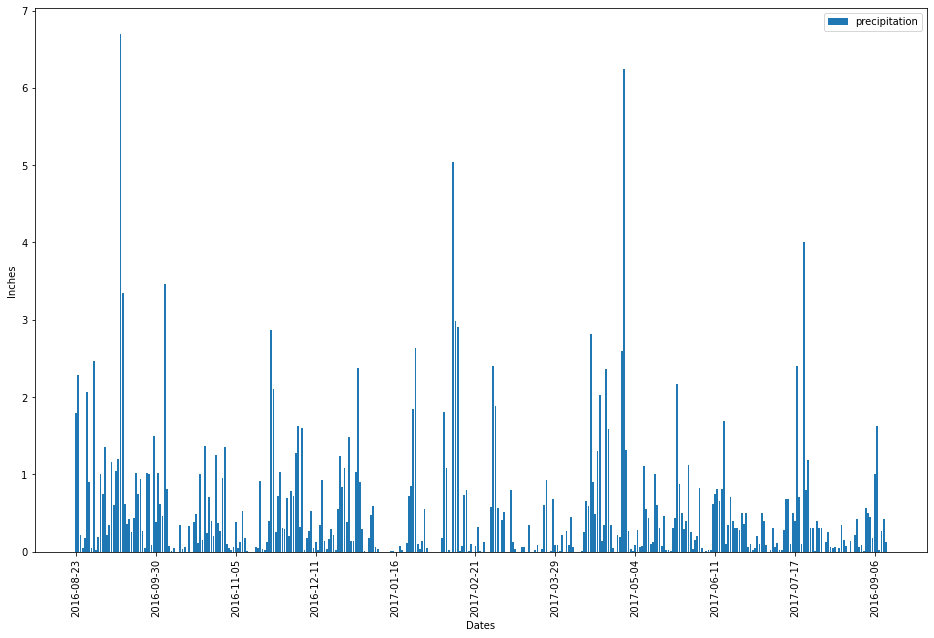

In [37]:
plt.figure(figsize=(16,10))
plt.bar(df.date, df.prcp, label="precipitation")
plt.xticks(np.arange(0, 366, 36), rotation=90)
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.legend(loc='upper right')
plt.show()

In [16]:
df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
df.groupby("date").describe()

prcp                                                       
           count      mean       std   min     25%    50%     75%   max
date                                                                   
2016-08-23   6.0  0.451667  0.706468  0.00  0.0275  0.100  0.5625  1.79
2016-08-24   6.0  1.555000  0.840541  0.08  1.2775  1.800  2.1500  2.28
2016-08-25   7.0  0.077143  0.071813  0.00  0.0300  0.080  0.0950  0.21
2016-08-26   6.0  0.016667  0.016330  0.00  0.0025  0.015  0.0275  0.04
2016-08-27   5.0  0.064000  0.081731  0.00  0.0000  0.020  0.1200  0.18
...          ...       ...       ...   ...     ...    ...     ...   ...
2017-08-19   3.0  0.030000  0.051962  0.00  0.0000  0.000  0.0450  0.09
2017-08-20   2.0  0.005000  0.007071  0.00  0.0025  0.005  0.0075  0.01
2017-08-21   3.0  0.193333  0.317700  0.00  0.0100  0.020  0.2900  0.56
2017-08-22   3.0  0.166667  0.288675  0.00  0.0000  0.000  0.2500  0.50
2017-08-23   4.0  0.132500  0.215000  0.00  0.0000  0.040  0.1725  0.45

[366 rows x 8 columns]

In [25]:
# Design a query to show how many stations are available in this dataset?

query = """
            SELECT
              *
            FROM
                station
        """
# Query All Records in the the Database
df2 = pd.read_sql(query, con=db)

# Preview the Data
df2.head(10)


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [26]:
len(df2)

9

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query = """
            SELECT
              s.station,
              count(*) as record_count
            FROM
                measurement m
            JOIN station s on m.station=s.station
            GROUP BY
                s.station
            ORDER BY
                record_count desc
        """
# Query All Records in the the Database
df3 = pd.read_sql(query, con=db)

# Preview the Data
df3.head(10)

,station,record_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

query = """
            SELECT
                m.*,
                s.id as station_id,
                s.name,
                s.latitude,
                s.longitude,
                s.elevation
            FROM
                measurement m
            JOIN station s on m.station=s.station
        
        """
# Query All Records in the the Database
all_data = pd.read_sql(query, con=db)

# Preview the Data
all_data.head(10)

,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
5,6,USC00519397,2010-01-07,0.06,70.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
6,7,USC00519397,2010-01-08,0.00,64.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
7,8,USC00519397,2010-01-09,0.00,68.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
8,9,USC00519397,2010-01-10,0.00,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
9,10,USC00519397,2010-01-11,0.01,64.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [29]:
all_data.station.value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [30]:
all_data.loc[all_data.station=='USC00519281'].tobs.describe()

count    2772.000000
mean       71.663781
std         4.357642
min        54.000000
25%        69.000000
50%        72.000000
75%        74.000000
max        85.000000
Name: tobs, dtype: float64

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

query = """
            SELECT
                max(m.station),
                min(m.tobs),
                max(m.tobs),
                avg(m.tobs),
                count(m.tobs)
            FROM
                measurement m
            JOIN station s on m.station=s.station
            WHERE
                m.station='USC00519281'
             
        """
# Query All Records in the the Database
aggregate = pd.read_sql(query, con=db)

# Preview the Data
aggregate.head(10)

,max(m.station),min(m.tobs),max(m.tobs),avg(m.tobs),count(m.tobs)
0,USC00519281,54.0,85.0,71.663781,2772


In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

query = """
            SELECT
                m.*,
                s.id as station_id,
                s.name,
                s.latitude,
                s.longitude,
                s.elevation
            FROM
                measurement m
            JOIN station s on m.station=s.station
            WHERE
                m.station='USC00519281'
                and  date >= '2016-08-23'
        
        """
# Query All Records in the the Database
station_data = pd.read_sql(query, con=db)

# Preview the Data
station_data.head(10)

,id,station,date,prcp,tobs,station_id,name,latitude,longitude,elevation
0,14608,USC00519281,2016-08-23,1.79,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,14609,USC00519281,2016-08-24,2.15,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,14610,USC00519281,2016-08-25,0.06,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,14611,USC00519281,2016-08-26,0.01,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
4,14612,USC00519281,2016-08-27,0.12,75.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5,14613,USC00519281,2016-08-28,0.60,73.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,14614,USC00519281,2016-08-29,0.35,78.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,14615,USC00519281,2016-08-30,0.00,77.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
8,14616,USC00519281,2016-08-31,0.24,78.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
9,14617,USC00519281,2016-09-01,0.02,80.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


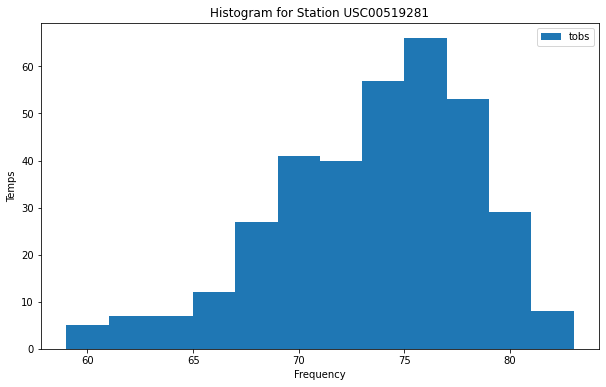

In [39]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

plt.figure(figsize=(10,6))
plt.hist(station_data.tobs, bins=12, label="tobs")
plt.title("Histogram for Station USC00519281")
plt.xlabel("Frequency")
plt.ylabel("Temps")
plt.legend(loc="upper right")
plt.show()